# Demo 1: Linkage Matrix to Dendrogram

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from graphviz import Digraph
from scipy.cluster.hierarchy import dendrogram

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["font.size"] = 16

In [4]:
df = pd.DataFrame([[2,1], [5,1], [5,5]], columns=["x", "y"], index=["A", "B", "C"])
df

,x,y
A,2,1
B,5,1
C,5,5


In [5]:
graph = np.array([
       ["A", None, None, 0, 1],
       ["B", None, None, 0, 1],
       ["C", None, None, 0, 1],
       ["cluster1", 0, 1, 3, 3],
       ["cluster0", 3, 2, 4.5, 2]])
graph = pd.DataFrame(graph, columns=["name", "left", "right", "distance", "nodes"]).fillna("")
graph

,name,left,right,distance,nodes
0,A,,,0.0,1
1,B,,,0.0,1
2,C,,,0.0,1
3,cluster1,0,1,3.0,3
4,cluster0,3,2,4.5,2


In [6]:
leaf_labels = graph.values[:3, 0]
leaf_labels

array(['A', 'B', 'C'], dtype=object)

In [7]:
graph.values

array([['A', '', '', 0.0, 1],
       ['B', '', '', 0.0, 1],
       ['C', '', '', 0.0, 1],
       ['cluster1', 0, 1, 3.0, 3],
       ['cluster0', 3, 2, 4.5, 2]], dtype=object)

In [8]:
link_matrix = graph.values[3:, 1:].astype(float)
link_matrix

array([[0. , 1. , 3. , 3. ],
       [3. , 2. , 4.5, 2. ]])

{'icoord': [[5.0, 5.0, 15.0, 15.0], [10.0, 10.0, 25.0, 25.0]],
 'dcoord': [[0.0, 3.0, 3.0, 0.0], [3.0, 4.5, 4.5, 0.0]],
 'ivl': ['A', 'B', 'C'],
 'leaves': [0, 1, 2],
 'color_list': ['g', 'b']}

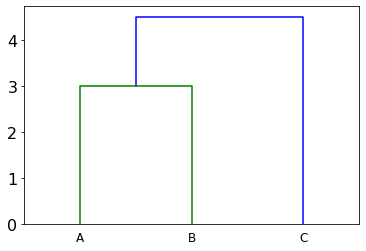

In [9]:
dendrogram(link_matrix, labels=leaf_labels)

# Demo 2: Tree to Linkage Matrix

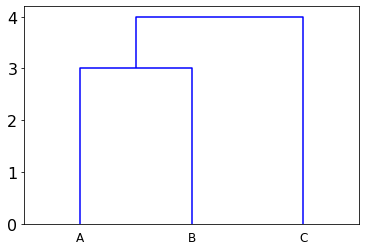

In [10]:
# binary tree for cluster hierarchy:
#  - 0 or 2 children
#  - parent records distance between siblings

class Node:
    def __init__(self, name, left=None, right=None, dist=0, data=None):
        self.name = name
        self.data = data
        self.dist = dist
        self.children = []
        if left != None:
            # non-leaf
            assert right != None
            assert data is None
            self.children.append(left)
            self.children.append(right)
        else:
            assert right == None
            assert data is not None

    def draw(self, gv):
        gv.node(self.name)
        for child in self.children:
            child.draw(gv)
            gv.edge(self.name, child.name)

    def __repr__(self):
        return f"Node({self.name})"

    def _repr_svg_(self):
        g = Digraph()
        self.draw(g)
        return g._repr_svg_()

    def fill_node_list(self, nodes, child_count=None):
        for c in self.children:
            c.fill_node_list(nodes, child_count)
        if child_count == None or len(self.children) == child_count:
            nodes.append(self)
    
    def draw_hierarchy(self):
        leafs = []
        nonleafs = []
        self.fill_node_list(leafs, child_count=0)
        self.fill_node_list(nonleafs, child_count=2)
        for idx, node in enumerate(leafs+nonleafs):
            node.idx = idx
            
        leaf_labels = []
        for node in leafs:
            leaf_labels.append(node.name)
            
        links = []
        for node in nonleafs:
            links.append([node.children[0].idx, node.children[1].idx, node.dist, 0])
        links = np.array(links).astype(float)
        dendrogram(links, labels=leaf_labels)

A = Node("A", data=df.loc["A"].values)
B = Node("B", data=df.loc["B"].values)
C = Node("C", data=df.loc["C"].values)
Y = Node("cluster1", A, B, 3)
X = Node("cluster0", Y, C, 4)
X.draw_hierarchy()

# Demo 3: Data => Tree

In [11]:
# binary tree for cluster hierarchy:
#  - 0 or 2 children
#  - parent records distance between siblings

class Node:
    def __init__(self, name, left=None, right=None, dist=0, data=None):
        self.name = name
        self.data = data
        self.dist = dist
        self.children = []
        if left != None:
            # non-leaf
            assert right != None
            assert data is None
            self.children.append(left)
            self.children.append(right)
        else:
            assert right == None
            assert data is not None

    def draw(self, gv):
        gv.node(self.name)
        for child in self.children:
            child.draw(gv)
            gv.edge(self.name, child.name)

    def __repr__(self):
        return f"Node({self.name})"

    def _repr_svg_(self):
        g = Digraph()
        self.draw(g)
        return g._repr_svg_()

    def fill_node_list(self, nodes, child_count=None):
        for c in self.children:
            c.fill_node_list(nodes, child_count)
        if child_count == None or len(self.children) == child_count:
            nodes.append(self)
    
    def draw_hierarchy(self):
        leafs = []
        nonleafs = []
        self.fill_node_list(leafs, child_count=0)
        self.fill_node_list(nonleafs, child_count=2)
        for idx, node in enumerate(leafs+nonleafs):
            node.idx = idx
            
        leaf_labels = []
        for node in leafs:
            leaf_labels.append(node.name)
            
        links = []
        for node in nonleafs:
            links.append([node.children[0].idx, node.children[1].idx, node.dist, 0])
        links = np.array(links).astype(float)
        dendrogram(links, labels=leaf_labels)
        
    def distance(self, other):
        leafs1 = []
        leafs2 = []
        self.fill_node_list(leafs1, child_count=0)
        other.fill_node_list(leafs2, child_count=0)
        distances = []
        for node1 in leafs1:
            for node2 in leafs2:
                dist = ((node1.data - node2.data) ** 2).sum() ** 0.5
                distances.append(dist)
        return sum(distances) / len(distances)
        
A = Node("A", data=df.loc["A"].values)
B = Node("B", data=df.loc["B"].values)
C = Node("C", data=df.loc["C"].values)

{Node(C), Node(B), Node(A)}
{Node(cluster1), Node(C)}
{Node(cluster0)}


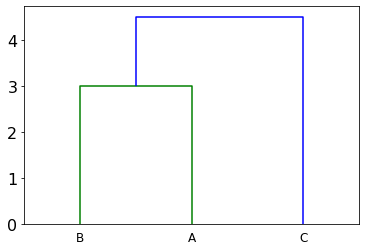

In [12]:
trees = {A, B, C} # each cluster is a tree
while len(trees) > 1:
    print(trees)
    best_dist = None
    for tree1 in trees:
        for tree2 in trees:
            if tree1 == tree2:
                continue
            dist = tree1.distance(tree2)
            if best_dist == None or dist < best_dist:
                best_dist = dist
                best_tree1 = tree1
                best_tree2 = tree2
    trees.remove(best_tree1)
    trees.remove(best_tree2)
    new_tree = Node(f"cluster{len(trees)}", best_tree1, best_tree2, best_dist)
    trees.add(new_tree)
print(trees)
root = list(trees)[0]
root.draw_hierarchy()